## Analysis of photons in LAr
In this notebook, we aim to analyse the dynamics of photons (gamma) in liquid argon (LAr).
These particles are extremely interesting in our study because they are largely emitted by de-excitation of Ar41. However, in the current simulated data, this process doesn't occur. Then, the analysis concern the gamma emitted by other processes (e.g. de-excitation of other atoms).

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 30})

# load data and show only meaningful fields
fields = ["PID", "tracknumber", "ParentTrackID", "energydeposition", "kineticenergy", "time", "x", "y", "z", "eventnumber", "parentnucleusPID", "creatorprocess"]
filepath = os.path.join("..", "Data", "output123456789.csv")
df = pd.read_csv(filepath, index_col=False)[fields]
df.head()

,PID,tracknumber,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,parentnucleusPID,creatorprocess
0,13,1,0,5375.22,279243000.0,53.5999,1139.06,1065.57,1950.00,0,0,None
1,13,1,0,4200.84,279238000.0,53.6688,1139.06,1065.58,1921.16,0,0,None
2,13,1,0,4811.86,279233000.0,53.7515,1139.05,1065.58,1900.49,0,0,None
3,13,1,0,2344.09,279227000.0,53.7971,1139.04,1065.59,1875.69,0,0,None
4,13,1,0,8229.72,279218000.0,53.9409,1139.04,1065.59,1862.05,0,0,None


To track the gammas, we proceed as follows:
- we select the event with lowest number of gammas' entries, so that the track of gammas results easy.
- we select a gamma with more than 1 entry to see how it moves and interact with other particles.

In [88]:
gammas = df[df.PID==22]
print("First events ordered by number of gammas entries:\n{}".format(gammas.groupby("eventnumber").PID.count().sort_values().head()))
event = df[df.eventnumber==45].sort_values("time")
df[df.energydeposition>0].PID.unique()

First events ordered by number of gammas entries:
eventnumber
45    47
21    50
71    69
72    71
92    72
Name: PID, dtype: int64


array([        13,         11,         22,        -11, 1000180380,
       1000180400, 1000180390, 1000190390, 1000180360, 1000180410,
       1000190419, 1000190410, 1000180370, 1000170370, 1000160360,
       1000020040])

Now, we select the gamma with tracknumber `354` because it presents a few entries.

In [82]:
gamma354 = event[(event.PID==22) & (event.tracknumber==354)]
gamma354

,PID,tracknumber,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,parentnucleusPID,creatorprocess
122286,22,354,129,0.0000,713.8100,57.7783,-85.7999,-293.264,926.881,45,0,eBrem
122287,22,354,129,0.0000,457.2240,58.3169,27.7428,-326.264,697.572,45,0,eBrem
122288,22,354,129,0.0000,262.3700,58.4423,61.1521,-325.837,539.586,45,0,eBrem
122289,22,354,129,0.0000,204.1090,58.4946,39.9204,-340.161,512.071,45,0,eBrem
122290,22,354,129,0.0000,149.6130,59.4088,27.0640,-331.325,513.747,45,0,eBrem
122291,22,354,129,0.0000,98.7354,59.7196,-134.4740,-390.733,727.006,45,0,eBrem
122292,22,354,129,0.0000,93.9022,59.8525,-134.1520,-482.719,712.172,45,0,eBrem
122293,22,354,129,0.0000,91.3460,59.9536,-141.2480,-456.816,741.610,45,0,eBrem
122294,22,354,129,0.0000,85.1101,59.9901,-165.2740,-442.603,753.409,45,0,eBrem
122295,22,354,129,0.0000,65.0849,60.0186,-169.2410,-433.792,758.564,45,0,eBrem


During the simulation, the gamma `354` interacts with other particles, changing its kinetic energy (KE).
To understand what happens in those step, we look for the particles forced by the gamma `354`: these are **electrons** produced by **Compton scattering**.

In [45]:
scatterElectrons = event[(event.ParentTrackID==354)]
scatterElectrons

,PID,tracknumber,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,parentnucleusPID,creatorprocess
122307,11,551,354,41.93590,0.0,57.7784,27.7428,-326.264,697.572,45,0,compt
122306,11,552,354,256.58600,0.0,58.3178,61.1521,-325.837,539.586,45,0,compt
122305,11,553,354,194.85400,0.0,58.4429,39.9204,-340.161,512.071,45,0,compt
122304,11,554,354,58.26050,0.0,58.4948,27.0640,-331.325,513.747,45,0,compt
122303,11,555,354,54.49630,0.0,59.4089,-134.4740,-390.733,727.006,45,0,compt
122302,11,556,354,50.87770,0.0,59.7197,-134.1520,-482.719,712.172,45,0,compt
122301,11,557,354,4.83314,0.0,59.8525,-141.2480,-456.816,741.610,45,0,compt
122300,11,558,354,2.55625,0.0,59.9536,-165.2740,-442.603,753.409,45,0,compt
122299,11,559,354,6.23584,0.0,59.9901,-169.2410,-433.792,758.564,45,0,compt
122298,11,560,354,20.02520,0.0,60.0186,-176.1700,-429.345,756.326,45,0,compt


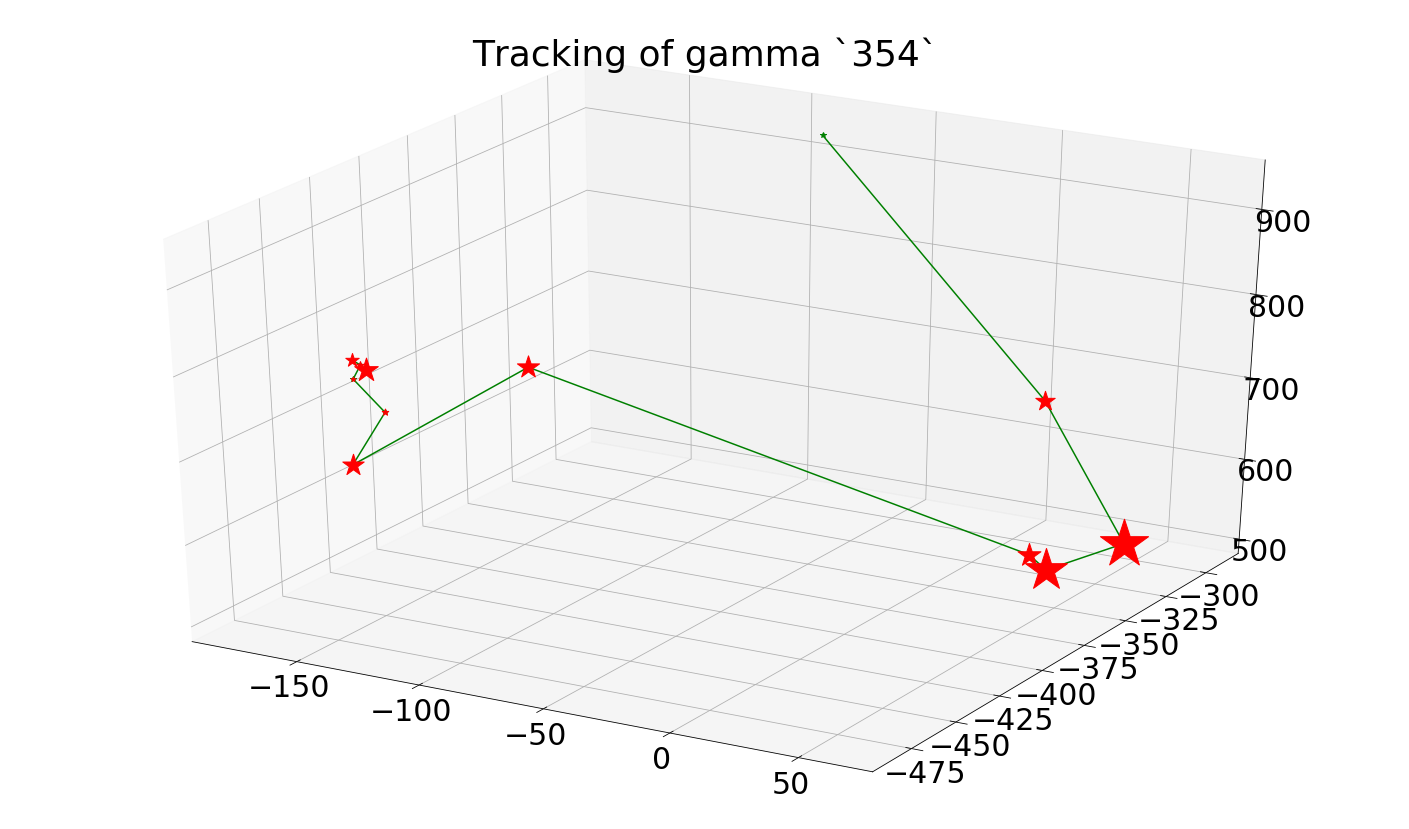

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(gamma354.x, gamma354.y, gamma354.z, c='g', marker='*')
for e in scatterElectrons.tracknumber.unique():
    elect = scatterElectrons[scatterElectrons.tracknumber == e][["x", "y", "z", "energydeposition"]]    
    x,y,z =elect.x, elect.y, elect.z
    ax.scatter(x, y, z, c='r', marker='*', s=10*elect.energydeposition)
plt.title("Tracking of gamma `354`")
plt.show()

In the plot above, we report the gamma trajectory (*green line*). We notice that it changes direction in occurrence of scattering of electrons (*red markers*) that deposit a certain amount of energy (*size of red marker*). Finally, the gamma deposit its energy (*green star*) when reach the volume border.